# Machine Learning 

In [105]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter


# Load the data
X_train= pd.read_csv("../train/pheno_training_treated.csv")
X_train.drop(columns=["Sample_ID", "Event_time"], inplace=True)
y_train = X_train.pop("PrevalentHFAIL")

X_test = pd.read_csv("../test/pheno_test_treated.csv")
X_test.drop(columns=["Sample_ID", "Event_time"], inplace=True)
y_test = X_test.pop("PrevalentHFAIL")

print('Original dataset shape %s' % Counter(y_train))
# SMOTE is used in unbalanced datasets to balance it
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train))


Original dataset shape Counter({0.0: 3522, 1.0: 93})
Resampled dataset shape Counter({0.0: 3522, 1.0: 3522})


In [106]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_select = selector.transform(X_test)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Print the selected features
print(selected_features)

Index(['Age', 'BodyMassIndex', 'Smoking', 'BPTreatment', 'PrevalentCHD',
       'Sex'],
      dtype='object')


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# data preparation
X_train = X_train.loc[:, selected_features]

X_test = X_test.loc[:, selected_features]



PECC accuracy: 0.5002763957987839


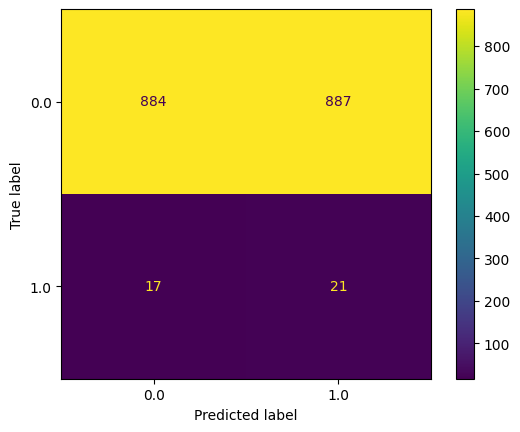

              precision    recall  f1-score   support

         0.0       0.98      0.50      0.66      1771
         1.0       0.02      0.55      0.04        38

    accuracy                           0.50      1809
   macro avg       0.50      0.53      0.35      1809
weighted avg       0.96      0.50      0.65      1809



In [108]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Initialize the model
clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the PECC accuracy
pec_acc = (y_test == y_pred).mean()
print("PECC accuracy:", pec_acc)

# Plot the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=clf.classes_)
disp1.plot()
plt.show()

# print the classification report
print(classification_report(y_test, y_pred))

In [95]:
y_pred_df = pd.DataFrame(y_pred, columns=["A"])
y_pred_df.loc[y_pred_df["A"] == 1.0]

,A


In [97]:
from sklearn.svm import SVC

# Initialize the model
clf = SVC(kernel="linear", random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.9198452183526811
